In [19]:
#!pip install pywaffle
from urllib import request
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

  Obtaining dependency information for pywaffle from https://files.pythonhosted.org/packages/0b/99/e564248b5a2ec8f005a6209e2e59a458ce4850281fb28e4aa3571fe91f52/pywaffle-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/8f/fc/295f4f71fc157de68dcf25a4850953e61f6eca644e7416f10a281ed42441/fontawesomefree-6.5.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 8.2 MB/s eta 0:00:0000:0100:01


In [26]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/augustincablant/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/augustincablant/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/augustincablant/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/augustincablant/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/augustincablant/nltk_data...


True

In [27]:
!python -m spacy download fr_core_news_sm
!python -m spacy download en_core_web_sm

/Users/augustincablant/Documents/GitHub/Learning-ML/.conda/bin/python: No module named spacy
/Users/augustincablant/Documents/GitHub/Learning-ML/.conda/bin/python: No module named spacy


In [2]:
url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]

import re


def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

In [4]:
len(dumas)

722839

In [6]:
url = "https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv"

# 1. Import des données
horror = pd.read_csv(url, encoding="latin-1")
# 2. Majuscules aux noms des colonnes
horror.columns = horror.columns.str.capitalize()
# 3. Retirer le prefixe id
horror["ID"] = horror["Id"].str.replace("id", "")
horror = horror.set_index("Id")

In [7]:
horror.sample(5)

,Text,Author,ID
Id,,,
id04984,This behavior on the part of my eye in the gut...,EAP,04984
id08907,Three of these were filled with statues of gig...,EAP,08907
id13678,"Shall I bow my head before them, and with serv...",MWS,13678
id25434,"It seemed, therefore, that the effect of such ...",EAP,25434
id03556,His Grace's brain reeled as he glanced upward.,EAP,03556


<Axes: ylabel='Author'>

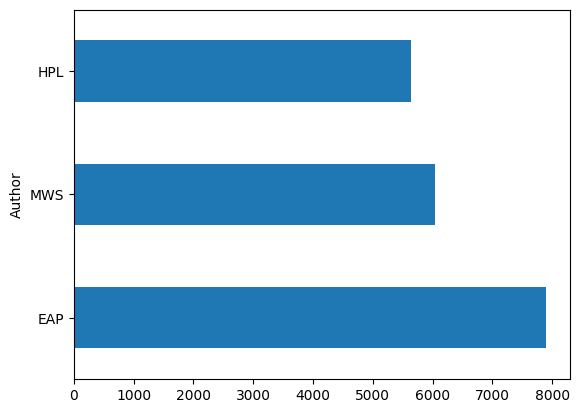

In [8]:
(horror.value_counts("Author").plot(kind="barh"))

In [9]:
horror.columns 

Index(['Text', 'Author', 'ID'], dtype='object')

In [22]:
horror['fear'] = horror['Text'].apply(lambda x: 'fear' in x.split(' ') or 'Fear' in x.split(' '))
horror

,Text,Author,ID,fear
Id,,,,
id26305,"This process, however, afforded me no means of...",EAP,26305,False
id17569,It never once occurred to me that the fumbling...,HPL,17569,False
id11008,"In his left hand was a gold snuff box, from wh...",EAP,11008,False
id27763,How lovely is spring As we looked from Windsor...,MWS,27763,False
id12958,"Finding nothing else, not even gold, the Super...",HPL,12958,False
...,...,...,...,...
id17718,"I could have fancied, while I looked at it, th...",EAP,17718,False
id08973,The lids clenched themselves together as if in...,EAP,08973,False
id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,05267,False


In [23]:
result = horror[['fear', 'Author']].groupby('Author').sum().reset_index()
result

,Author,fear
0,EAP,13
1,HPL,76
2,MWS,83


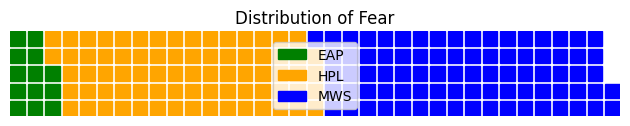

In [25]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=result['fear'],
    title={'label': 'Distribution of Fear', 'loc': 'center'},
    labels=["EAP", "HPL", 'MWS'],
    colors=["green", "orange", 'blue']
)

plt.show()

In [29]:
from nltk.tokenize import word_tokenize

word_tokenize(dumas[10000:10100])

['mes',
 'yeux',
 '.',
 '--',
 'vous',
 'avez',
 'donc',
 'vu',
 "l'empereur",
 'aussi',
 '?',
 '--',
 'il',
 'est',
 'entré',
 'chez',
 'le',
 'maréchal',
 'pendant',
 'que',
 'j',
 "'",
 'y',
 'éta']

In [31]:
#!pip install spacy
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("fr_core_news_sm")
doc = nlp(dumas[10000:10100])

text_tokenized = []
for token in doc:
    text_tokenized += [token.text]

", ".join(text_tokenized)

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/c2/5e/f3a851f4c90e61c64956c952387db9b6557863a15050616929886cdcab45/spacy-3.7.5-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/4b/13/522e3366c44474e43a192390f2622ae514605c1cfe6277a657e641823692/murmurhash-1.0.10-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org

OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.